In [14]:
using Flux
using Flux: Chain, crossentropy, gradient
using SparseArrays
struct SprAffine{F,S,T}
    W::S
    b::T
    σ::F
end
SprAffine(in::Integer, out::Integer, σ::Function) = SprAffine(sprandn(out, in, 0.5), sprandn(out, 0.5), σ)
(m::SprAffine)(x) = m.σ.(m.W * x .+ m.b)
Flux.@treelike SprAffine
loss(x, y) = crossentropy(m(x), y)
m = Chain(SprAffine(4, 3, σ), SprAffine(3, 2, σ), softmax);

TypeError: TypeError: in typeassert, expected Integer, got typeof(in)

In [3]:
typeof(loss(sparse(1:4), sparse(1:2)))

Float64

In [8]:
dloss(x) = gradient(() -> loss(x, sparse(1:2)), params(m));

In [9]:
dloss(sparse(1:4))

MethodError: MethodError: no method matching back!(::Float64)
Closest candidates are:
  back!(::Any, !Matched::Any; once) at /home/olszewskip/.julia/packages/Tracker/cpxco/src/back.jl:75
  back!(!Matched::Tracker.TrackedReal; once) at /home/olszewskip/.julia/packages/Tracker/cpxco/src/lib/real.jl:14
  back!(!Matched::TrackedArray) at /home/olszewskip/.julia/packages/Tracker/cpxco/src/lib/array.jl:68

In [5]:
gradient(params(m)) do
    loss(sparse(1:4), sparse(1:2))
end

MethodError: MethodError: no method matching back!(::Float64)
Closest candidates are:
  back!(::Any, !Matched::Any; once) at /home/olszewskip/.julia/packages/Tracker/cpxco/src/back.jl:75
  back!(!Matched::Tracker.TrackedReal; once) at /home/olszewskip/.julia/packages/Tracker/cpxco/src/lib/real.jl:14
  back!(!Matched::TrackedArray) at /home/olszewskip/.julia/packages/Tracker/cpxco/src/lib/array.jl:68

---

In [1]:
using Flux
using SparseArrays

In [5]:
W = sprand(3, 4, 0.5)
b = sprand(3, 0.5);

f(x) = sum(W * x + b);

In [6]:
f(sparse(1:4))

5.681872316740322

In [9]:
W = param(W);
b = param(b);

In [11]:
grads = Tracker.gradient(() -> f(sparse(1:4)), params(W, b));

In [13]:
grads[W]

Tracked 3×4 SparseMatrixCSC{Float64,Int64}:
 1.0  2.0  3.0  4.0
 1.0  2.0  3.0  4.0
 1.0  2.0  3.0  4.0

---

In [1]:
using Flux
using Flux: crossentropy
using SparseArrays
struct Affine{S,T}
    W::S
    b::T
end
Affine(in::Integer, out::Integer) = Affine(param(randn(out, in)), param(randn(out)))
(m::Affine)(x) = m.W * x .+ m.b
Flux.@treelike Affine
loss(x, y) = crossentropy(m(x), y)
m = Chain(Affine(4, 3), Affine(3, 2), softmax);

In [125]:
using Flux
using Flux: crossentropy
using SparseArrays
struct SprAffine{F,S,T}
    W::S
    b::T
    σ::F
end
SprAffine(in::Integer, out::Integer, σ::Function) = SprAffine(param(sprandn(out, in, 0.1)), param(sprandn(out, 0.2)), σ)
(m::SprAffine)(x) = m.σ.(m.W * x .+ m.b)
Flux.@treelike SprAffine
loss(x, y) = crossentropy(m(x), y)
m = Chain(SprAffine(100, 20, σ), SprAffine(20, 2, σ), softmax);

In [126]:
for param in params(m).params
    dropzeros!(param.grad)
end

In [72]:
Flux.Tracker.back!(loss(sparse(1:100), sparse(1:2)))

In [127]:
grads =
Flux.Tracker.gradient(params(m)) do
    loss(sparse(1:100), sparse(1:2))
end;

In [128]:
Flux.Tracker.update!(Flux.Descent(), params(m), grads);

In [129]:
Flux.Tracker.data(m[1].W)

20×100 SparseMatrixCSC{Float64,Int64} with 642 stored entries:
  [4  ,   1]  =  -1.06038e-43
  [5  ,   1]  =  -5.23804e-29
  [6  ,   1]  =  4.02608e-47
  [8  ,   1]  =  3.52797e-110
  [9  ,   1]  =  4.71797e-78
  [12 ,   1]  =  -0.677468
  [4  ,   2]  =  -2.12075e-43
  [5  ,   2]  =  -1.04761e-28
  [6  ,   2]  =  8.05216e-47
  [8  ,   2]  =  7.05595e-110
  [9  ,   2]  =  9.43593e-78
  [18 ,   2]  =  0.281359
  ⋮
  [5  ,  99]  =  -5.18566e-27
  [6  ,  99]  =  3.98582e-45
  [8  ,  99]  =  -1.1101
  [9  ,  99]  =  4.67079e-76
  [17 ,  99]  =  -2.16605
  [1  , 100]  =  -0.561005
  [4  , 100]  =  -1.06038e-41
  [5  , 100]  =  -5.23804e-27
  [6  , 100]  =  4.02608e-45
  [8  , 100]  =  3.52797e-108
  [9  , 100]  =  0.429002
  [14 , 100]  =  0.542006

In [146]:
Set() += [1]

ErrorException: syntax: invalid assignment location "Set()"

In [130]:
m[1].W.grad

20×100 SparseMatrixCSC{Float64,Int64} with 500 stored entries:
  [4  ,   1]  =  0.0
  [5  ,   1]  =  0.0
  [6  ,   1]  =  0.0
  [8  ,   1]  =  0.0
  [9  ,   1]  =  0.0
  [4  ,   2]  =  0.0
  [5  ,   2]  =  0.0
  [6  ,   2]  =  0.0
  [8  ,   2]  =  0.0
  [9  ,   2]  =  0.0
  [4  ,   3]  =  0.0
  [5  ,   3]  =  0.0
  ⋮
  [8  ,  98]  =  0.0
  [9  ,  98]  =  0.0
  [4  ,  99]  =  0.0
  [5  ,  99]  =  0.0
  [6  ,  99]  =  0.0
  [8  ,  99]  =  0.0
  [9  ,  99]  =  0.0
  [4  , 100]  =  0.0
  [5  , 100]  =  0.0
  [6  , 100]  =  0.0
  [8  , 100]  =  0.0
  [9  , 100]  =  0.0

In [135]:
sortperm([2,1,-3], by=abs)[2:end]

2-element Array{Int64,1}:
 1
 3

In [8]:
Flux.train!(loss, Flux.params(m), [(sparse(1:100), sparse(1:2))], Flux.ADAM())

In [91]:
I, J, V = findnz(Flux.Tracker.data(m[1].W));

---

In [1]:
using Flux, Flux.Data.MNIST

In [31]:
labels = MNIST.labels();

In [3]:
imgs = MNIST.images();

lighter_than(pixel, threshold) = pixel.val > threshold

function lightness_threshold(pixel_array::Array{T, 2}, threshold) where T
    convert.(T, lighter_than.(pixel_array, threshold))
end

imgs_blackenwhite = lightness_threshold.(imgs, 0.7);

In [32]:
labels[10_000]

7

In [30]:
imgs_blackenwhite[10_000]

In [5]:
X = hcat(convert.(Array{Float32, 1}, reshape.(imgs_blackenwhite, :))...);

In [6]:
using PyPlot
# x = range(0,stop=2*pi,length=1000); y = sin.(3*x + 4*cos.(2*x))
# plot(x, y, color="red", linewidth=2.0, linestyle="--")

In [7]:
black_fractions = sum(X, dims=1) ./ size(X)[1]

1×60000 Array{Float32,2}:
 0.116071  0.131378  0.0625  0.0765306  …  0.0841837  0.0803571  0.0816327

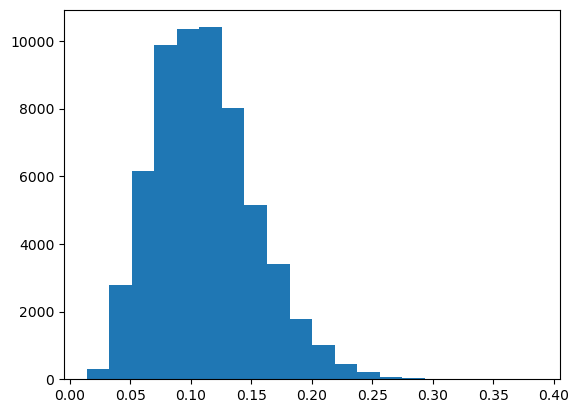

In [10]:
hist(black_fractions[:], 20);

In [11]:
using Statistics

In [12]:
mean(black_fractions)

0.111577585f0

In [13]:
std(black_fractions)

0.041507926f0

In [14]:
?randperm

search:

Couldn't find randperm
Perhaps you meant invperm or rand


No documentation found.

Binding `randperm` does not exist.


In [16]:
using Random

In [22]:
rand_indices = shuffle(1:size(X)[1]);

In [27]:
# rand_indices[sortperm(rand_indices)]

In [29]:
X = X[rand_indices, :];